# Titanic dataset : Tree Based Modelling

In [69]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Import the dataset
data = pd.read_csv("data_cleaned.csv")

## EDA

In [3]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [4]:
data.shape

(891, 25)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   Fare        891 non-null    float64
 3   Pclass_1    891 non-null    int64  
 4   Pclass_2    891 non-null    int64  
 5   Pclass_3    891 non-null    int64  
 6   Sex_female  891 non-null    int64  
 7   Sex_male    891 non-null    int64  
 8   SibSp_0     891 non-null    int64  
 9   SibSp_1     891 non-null    int64  
 10  SibSp_2     891 non-null    int64  
 11  SibSp_3     891 non-null    int64  
 12  SibSp_4     891 non-null    int64  
 13  SibSp_5     891 non-null    int64  
 14  SibSp_8     891 non-null    int64  
 15  Parch_0     891 non-null    int64  
 16  Parch_1     891 non-null    int64  
 17  Parch_2     891 non-null    int64  
 18  Parch_3     891 non-null    int64  
 19  Parch_4     891 non-null    i

## Splitting the dataset

In [6]:
X = data.drop(['Survived'],axis = 1)
y = data['Survived']

In [7]:
# Making Training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

# 1. Decision Tree Modelling

In [8]:
# Importing library
from sklearn.tree import DecisionTreeClassifier

In [9]:
model = DecisionTreeClassifier(criterion = 'gini', random_state = 15)

In [10]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=15)

In [11]:
# Training and Testing Accuracy
print("Training Accuracy Score:{}".format(model.score(X_train, y_train)))
print("Testing Accuracy Score:{}".format(model.score(X_test, y_test)))

Training Accuracy Score:0.9871589085072231
Testing Accuracy Score:0.7574626865671642


> Clearly Suffering from **Overfitting**.

### Tree Diagram

In [12]:
# Import library
from sklearn import tree

[Text(821.4780164490365, 795.9857142857143, 'X[5] <= 0.5\ngini = 0.479\nsamples = 623\nvalue = [375, 248]'),
 Text(513.9398057175456, 757.1571428571428, 'X[2] <= 0.5\ngini = 0.322\nsamples = 397\nvalue = [317, 80]'),
 Text(270.9577047413793, 718.3285714285714, 'X[0] <= 6.5\ngini = 0.261\nsamples = 311\nvalue = [263, 48]'),
 Text(122.73453346855983, 679.5, 'X[1] <= 19.913\ngini = 0.473\nsamples = 13\nvalue = [5, 8]'),
 Text(111.41607505070994, 640.6714285714286, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(134.05299188640973, 640.6714285714286, 'X[4] <= 0.5\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(122.73453346855983, 601.8428571428572, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(145.37145030425964, 601.8428571428572, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(419.18087601419876, 679.5, 'X[21] <= 0.5\ngini = 0.232\nsamples = 298\nvalue = [258, 40]'),
 Text(249.80191430020284, 640.6714285714286, 'X[0] <= 9.5\ngini = 0.203\nsamples = 261\nvalue = [231, 30]'),
 

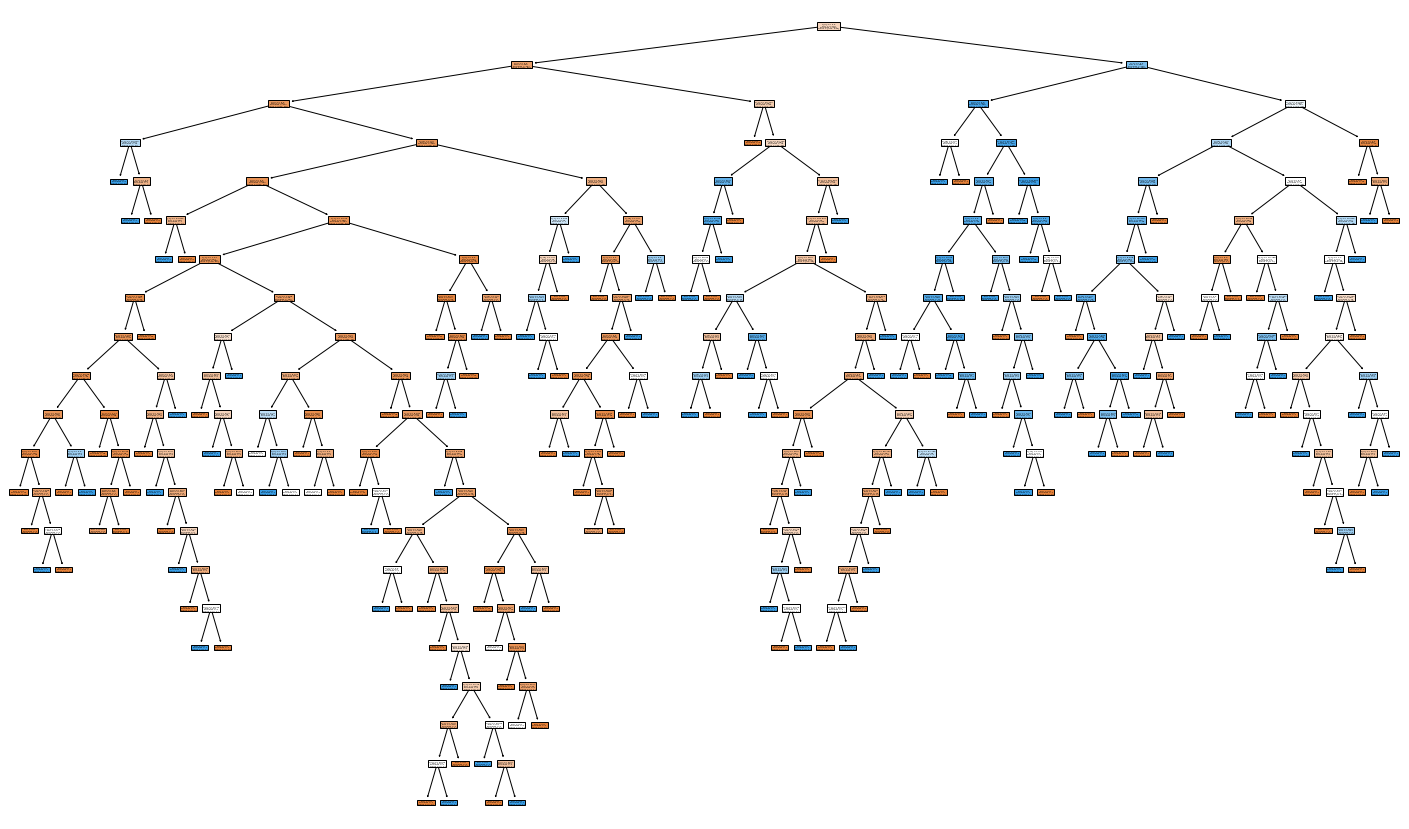

In [13]:
# Draw the tree diagram
plt.figure(figsize=(25,15))
tree.plot_tree(model,filled = True)

1. A Complex tree has been found. <br>
2. So now aim is to be reducing the overfitting by cutting the branches of tree. <br>
3. That can be done in two ways:
    * By prunning
    * By hyperparameter tuning 

4. Later Different Ensemble techniques can be used for better prediction.

In [14]:
model.tree_.max_depth

20

### 1.1 Improving Accuracy:

### 1.1.1 Cost-Complexity-Prunning

In [15]:
# Finding sequence of ccp_alpha
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

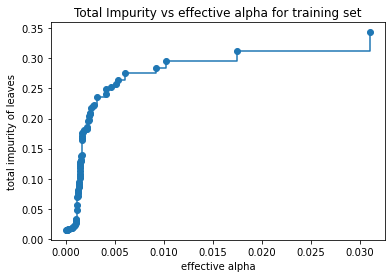

In [16]:
# Exclude tree with maximum effective alpha(only one leaf)
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [17]:
# Train Multiple Decision tree for different alphas
classifiers = []
for alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state = 15, ccp_alpha = alpha)
    model.fit(X_train, y_train)
    classifiers.append(model) 
# classifiers

### Comparing Nodes and Depth with alpha

In [18]:
# Removing the only one node case
classifiers = classifiers[:-1]
ccp_alphas = ccp_alphas[:-1]

In [19]:
# Node and Depth Count of Decision trees
node_counts = [model.tree_.node_count for model in classifiers]
depth = [model.tree_.max_depth for model in classifiers]
print("Node counts:{}".format(node_counts))
print("Maximum Depth:{}".format(depth))

Node counts:[335, 333, 331, 329, 325, 323, 319, 315, 311, 307, 305, 301, 295, 289, 281, 281, 255, 243, 219, 207, 207, 205, 201, 193, 189, 185, 181, 171, 155, 155, 155, 147, 143, 139, 135, 131, 129, 121, 119, 89, 85, 81, 75, 73, 71, 65, 65, 57, 55, 49, 47, 45, 39, 37, 35, 27, 25, 21, 19, 17, 15, 11, 9, 7, 5, 3]
Maximum Depth:[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 16, 16, 16, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 8, 8, 8, 8, 8, 8, 8, 8, 6, 6, 5, 4, 4, 4, 3, 3, 3, 2, 1]


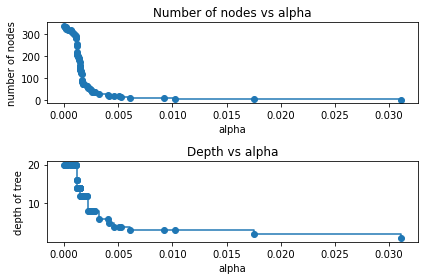

In [20]:
# Diagram of Nodes vs alpha & Depth vs alpha
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Accuracy vs alpha for training and testing sets

In [21]:
train_acc_scores = [model.score(X_train,y_train) for model in classifiers]
test_acc_scores = [model.score(X_test, y_test) for model in classifiers]

In [22]:
'''for i in range(len(classifiers)):
    print("Decisiontree{}: Training - {} , Testing - {} ".format(i,train_acc_scores[i],test_acc_scores[i]))'''

'for i in range(len(classifiers)):\n    print("Decisiontree{}: Training - {} , Testing - {} ".format(i,train_acc_scores[i],test_acc_scores[i]))'

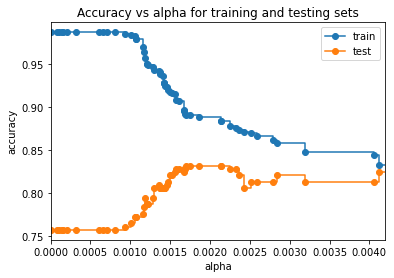

In [23]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_acc_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_acc_scores, marker="o", label="test", drawstyle="steps-post")
ax.set_xlim(0,0.0042)
ax.legend()
plt.show()

> From the diagram we can take the alpha value as 0.0042 to improve accuracy

### Modelling After prunning

In [24]:
model_after_prun = DecisionTreeClassifier(random_state = 15, ccp_alpha = 0.0042)
model_after_prun.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0042, random_state=15)

In [25]:
print("Training Accuracy:{}".format(model_after_prun.score(X_train, y_train)))
print("testing Accuracy:{}".format(model_after_prun.score(X_test, y_test)))

Training Accuracy:0.8330658105939005
testing Accuracy:0.8246268656716418


[Text(790.5, 747.4499999999999, 'X[5] <= 0.5\ngini = 0.479\nsamples = 623\nvalue = [375, 248]'),
 Text(465.0, 611.55, 'X[2] <= 0.5\ngini = 0.322\nsamples = 397\nvalue = [317, 80]'),
 Text(279.0, 475.65, 'X[0] <= 6.5\ngini = 0.261\nsamples = 311\nvalue = [263, 48]'),
 Text(186.0, 339.74999999999994, 'X[1] <= 19.913\ngini = 0.473\nsamples = 13\nvalue = [5, 8]'),
 Text(93.0, 203.8499999999999, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(279.0, 203.8499999999999, 'X[4] <= 0.5\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(186.0, 67.94999999999993, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(372.0, 67.94999999999993, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(372.0, 339.74999999999994, 'gini = 0.232\nsamples = 298\nvalue = [258, 40]'),
 Text(651.0, 475.65, 'X[1] <= 26.144\ngini = 0.467\nsamples = 86\nvalue = [54, 32]'),
 Text(558.0, 339.74999999999994, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(744.0, 339.74999999999994, 'X[1] <= 27.135\ngini = 0.484\nsamples 

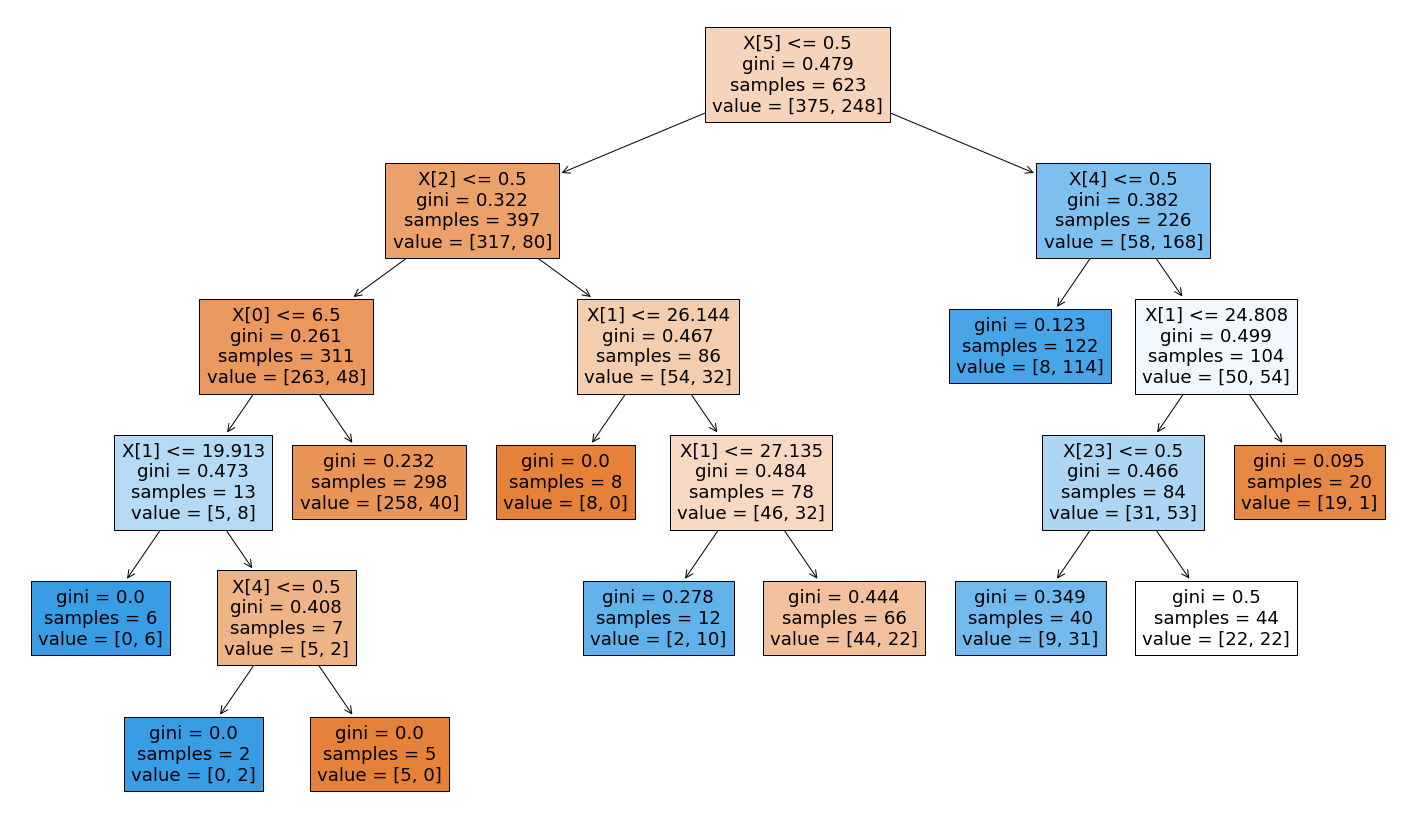

In [26]:
# Draw the tree diagram
plt.figure(figsize=(25,15))
tree.plot_tree(model_after_prun,filled = True)

> Hence we solve the problem of overfitting and also our testing accuracy is increased to 82%. <br>
> The tree diagram is also simpler one.

### 1.1.2 HyperParameter Tuning By GridSearchCV or RandomizedSearchCV

In [27]:
# Import library
from sklearn.model_selection import GridSearchCV

In [28]:
'''parameter_grid = {
    'criterion':['gini','entropy'],
    'max_depth':[3,4,5,6,7,8]
}'''

"parameter_grid = {\n    'criterion':['gini','entropy'],\n    'max_depth':[3,4,5,6,7,8]\n}"

In [29]:
parameter_grid = {
    'criterion':['gini','entropy'],
    'ccp_alpha':np.arange(0.01,0.10,0.001)
}

In [30]:
model_hyp = GridSearchCV(DecisionTreeClassifier(),parameter_grid,cv = 5,return_train_score = True)

In [31]:
model_hyp.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099,
       0.1  ]),
                         'criterion': ['gini', 'entropy']},
             return_train_score=True)

In [32]:
# model_hyp.cv_results_

In [33]:
df = pd.DataFrame(model_hyp.cv_results_)
# df

In [34]:
# df[['param_criterion','param_ccp_alpha','mean_test_score','mean_train_score']]

In [35]:
model_hyp.best_params_

{'ccp_alpha': 0.01, 'criterion': 'entropy'}

In [36]:
model_hyp.best_index_

1

In [37]:
from sklearn.model_selection import cross_validate
final_model = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 0.014)
scores = cross_validate(final_model, X,y,cv = 5,scoring = 'accuracy',return_train_score= True)

In [38]:
scores

{'fit_time': array([0.00797415, 0.00598335, 0.00698066, 0.00598311, 0.00498605]),
 'score_time': array([0.00299239, 0.00199509, 0.00199461, 0.00199509, 0.00099754]),
 'test_score': array([0.82122905, 0.81460674, 0.80337079, 0.79213483, 0.84269663]),
 'train_score': array([0.82303371, 0.82328191, 0.82047686, 0.82608696, 0.81486676])}

In [39]:
print('Training Score',scores['train_score'].mean())
print('Testing Score',scores['test_score'].mean())

Training Score 0.8215492380667223
Testing Score 0.8148076078086749


# 2. Random Forest Modelling

In [40]:
# Import Library
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate

In [41]:
model = RandomForestClassifier()

In [42]:
# 5-fold cross validation
scores = cross_validate(model, X, y, cv = 5, return_train_score = True)
scores

{'fit_time': array([0.20166254, 0.1935091 , 0.24047399, 0.22642541, 0.19647408]),
 'score_time': array([0.01593065, 0.01891971, 0.02091002, 0.01695442, 0.01595736]),
 'test_score': array([0.77094972, 0.80337079, 0.85393258, 0.7752809 , 0.81460674]),
 'train_score': array([0.98455056, 0.98737728, 0.98457223, 0.98457223, 0.98176718])}

In [43]:
print('Training Score',scores['train_score'].mean())
print('Testing Score',scores['test_score'].mean())

Training Score 0.9845678963707707
Testing Score 0.8036281463812692


> **Overfitting** is present. So let's do hyperparameter tuning.

### Hyperparameter tuning by GridSearch

In [44]:
'''parameter_grid = {
    'criterion':['gini','entropy'],
    'max_depth':[3,4,5,6,7,8]
}'''

"parameter_grid = {\n    'criterion':['gini','entropy'],\n    'max_depth':[3,4,5,6,7,8]\n}"

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid = {
    'n_estimators':[50,75,90,100],
    'max_depth' : [3,4,5,6,7],
    'max_features':[10,15,20]
}

In [47]:
model_hyp1 = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5, return_train_score = True)
model_hyp1.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': [10, 15, 20],
                         'n_estimators': [50, 75, 90, 100]},
             return_train_score=True)

In [48]:
# model_hyp1.cv_results_

In [49]:
df = pd.DataFrame(model_hyp1.cv_results_)
# df

In [50]:
df1 = df[['param_max_features','param_n_estimators','param_max_depth','mean_test_score','mean_train_score']]
df1

,param_max_features,param_n_estimators,param_max_depth,mean_test_score,mean_train_score
0,10,50,3,0.809196,0.828004
1,10,75,3,0.809196,0.823236
2,10,90,3,0.811431,0.826040
3,10,100,3,0.805825,0.827444
4,15,50,3,0.813684,0.829685
5,15,75,3,0.812560,0.832212
6,15,90,3,0.810320,0.832492
7,15,100,3,0.806974,0.834457
8,20,50,3,0.813697,0.829125
9,20,75,3,0.812579,0.830247


In [51]:
model_hyp1.best_params_

{'max_depth': 7, 'max_features': 20, 'n_estimators': 90}

In [52]:
model_hyp1.best_index_

58

In [53]:
df1.iloc[[23,59]]

,param_max_features,param_n_estimators,param_max_depth,mean_test_score,mean_train_score
23,20,100,4,0.814826,0.845679
59,20,100,7,0.826075,0.917228


### Final Model

In [54]:
final_model_rf = RandomForestClassifier(n_estimators = 100, max_features = 20, max_depth = 4)

In [55]:
scores = cross_validate(final_model_rf, X, y, cv = 5, return_train_score = True)
scores

{'fit_time': array([0.18849707, 0.17054367, 0.17255163, 0.15757847, 0.15959001]),
 'score_time': array([0.01296496, 0.01296568, 0.01196718, 0.0119679 , 0.01196814]),
 'test_score': array([0.81005587, 0.81460674, 0.81460674, 0.79775281, 0.85393258]),
 'train_score': array([0.8511236 , 0.85553997, 0.83309958, 0.84992987, 0.83590463])}

In [56]:
print('Training Score',scores['train_score'].mean())
print('Testing Score',scores['test_score'].mean())

Training Score 0.8451195297603101
Testing Score 0.8181909484652564


#### Feature Importance

In [64]:
fea_imp = final_model_rf.fit(X,y).feature_importances_
pd.Series(fea_imp,index = X.columns)

Age           0.106583
Fare          0.097996
Pclass_1      0.042505
Pclass_2      0.012855
Pclass_3      0.118703
Sex_female    0.265515
Sex_male      0.304692
SibSp_0       0.003033
SibSp_1       0.006499
SibSp_2       0.000187
SibSp_3       0.002371
SibSp_4       0.008414
SibSp_5       0.001972
SibSp_8       0.000000
Parch_0       0.004822
Parch_1       0.001274
Parch_2       0.001262
Parch_3       0.000000
Parch_4       0.000062
Parch_5       0.000302
Parch_6       0.000000
Embarked_C    0.002976
Embarked_Q    0.002805
Embarked_S    0.015172
dtype: float64

In [76]:
# Feature importance plot
def plot_feature_imp(importance, names, model_name):
    
    # Make a dict of importance and names
    fdict = {'feature imp':importance, 'feature names':names}
    
    # Make the dataframe of fdict
    fdf = pd.DataFrame(fdict)
    
    # Sort the Dataframe in decreasing order
    fdf.sort_values(by = ['feature imp'], ascending = False, inplace = True)
    
    # Set the Size of plot
    plt.figure(figsize=(15,5))
    # sns bar plot
    sns.barplot(x = fdf['feature imp'], y = fdf['feature names'])
    # Add Labels
    plt.title(model_name + ' feature importance')
    plt.xlabel('Feature Importances')
    plt.ylabel('Feature Names')

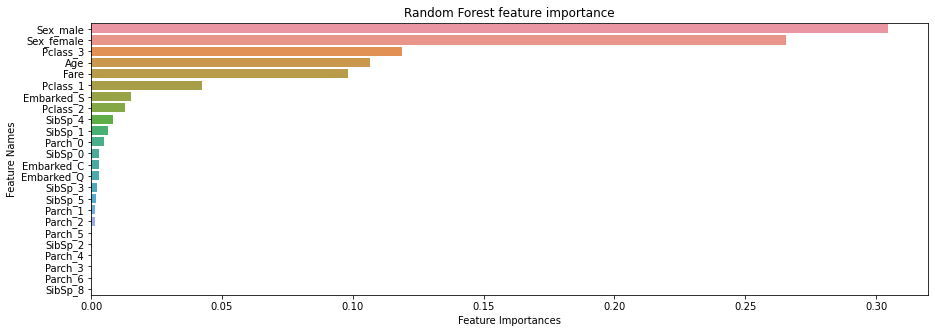

In [77]:
plot_feature_imp(fea_imp, X.columns, 'Random Forest')

# 3.Boosting